In [2]:
import pandas as pd

# Load both CSVs
df_li = pd.read_csv('Li_elements_2/all_props_new.csv')
df_zn = pd.read_csv('Zn_compounds/all_props_new.csv')

# Standardize column names
df_li = df_li.rename(columns={
    'results_per_li': 'results_per_atom',
    'LiSites': 'CationSites'
})

df_zn = df_zn.rename(columns={
    'results_per_zn': 'results_per_atom',
    'ZnSites': 'CationSites'
})

# Combine the DataFrames
df = pd.concat([df_li, df_zn], ignore_index=True)

print(df.shape)


(616, 18)


In [3]:
df

,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_atom,CationSites,CounterIonSites,results_per_counter_ion,res_per_volm_per_site,Result,SpaceGroup,SpaceGroupNumber,Total Sites,Reduced Formula
0,Ba,137.3300,268.0,0.89,5.212,NaN,272.0,18.816124,26.941269,0.698413,0.698413,0.026941,0.000559,0.559487,I-42d,122,126,Ba19Li44
1,Ba,137.3300,268.0,0.89,5.212,NaN,272.0,15.293690,61.174760,0.250000,0.250000,0.061175,0.000279,0.278575,I4/mmm,139,4,Ba3Li
2,Ba,137.3300,268.0,0.89,5.212,NaN,272.0,18.343399,22.929249,0.800000,0.800000,0.022929,0.000606,0.606374,P6_3/mmc,194,30,BaLi4
3,K,39.0983,275.0,0.82,4.341,0.501,289.7,1.991284,7.965135,0.250000,0.250000,0.007965,0.000034,0.033661,Pm-3m,221,4,K3Li
4,K,39.0983,275.0,0.82,4.341,0.501,289.7,1.925716,7.702865,0.250000,0.250000,0.007703,0.000034,0.033833,Fm-3m,225,4,K3Li
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Se,78.9700,190.0,2.55,9.752,2.021,28.9,2.714427,5.428853,0.500000,0.500000,0.005429,0.000119,0.119452,F-43m,216,2,ZnSe
612,S,32.0700,180.0,2.58,10.360,2.077,19.4,2.662137,5.324275,0.500000,0.500000,0.005324,0.000136,0.136220,P3m1,156,56,ZnS
613,Te,127.6000,206.0,2.10,9.010,1.971,38.0,2.714538,5.429076,0.500000,0.500000,0.005429,0.000095,0.095148,F-43m,216,6,ZnTe
614,Zr,91.2200,186.0,1.33,6.634,0.426,112.0,15.521209,23.281813,0.666667,0.666667,0.023282,0.000935,0.935449,Fd-3m,227,6,ZrZn2


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

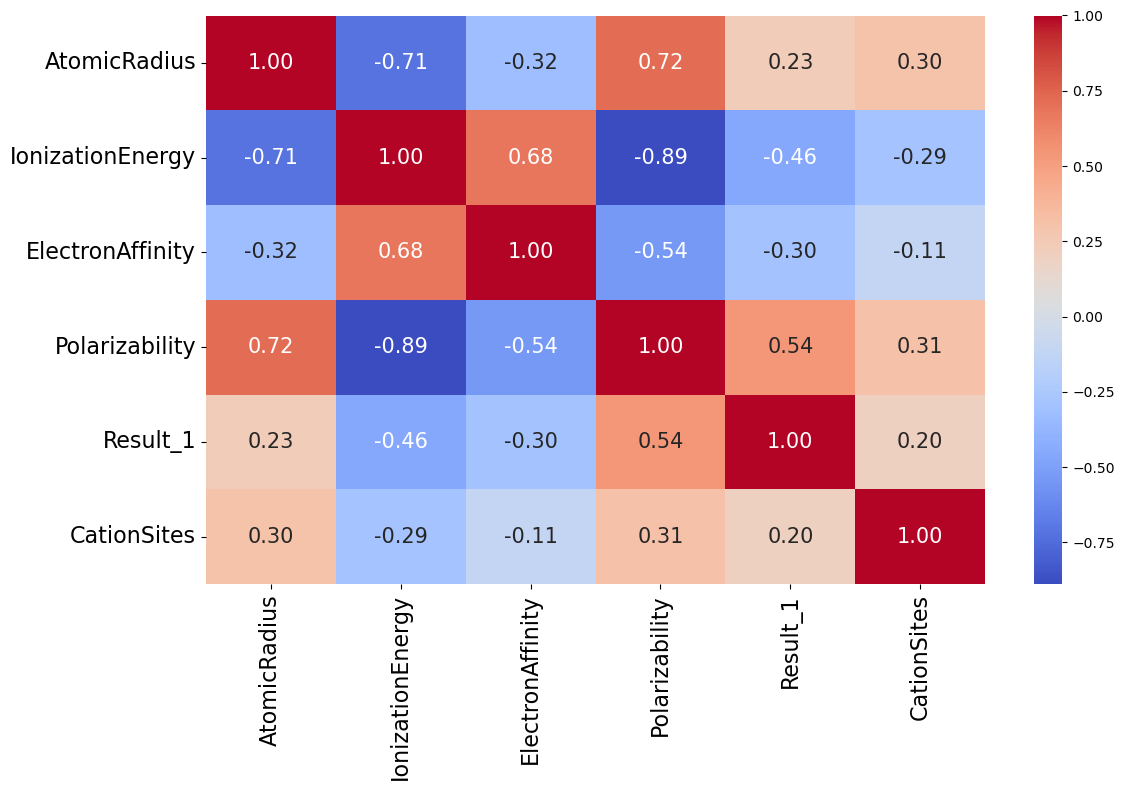

In [10]:

# df = pd.read_csv('all_props_new.csv')

X = df.drop(columns=['Symbol', 'SpaceGroup', 'Result', 'Reduced Formula', 
                     'res_per_volm_per_site', 'CounterIonSites', 
                     'Total Sites', 'SpaceGroupNumber'])

Y_total = df['results_per_total']
Y_li = df['results_per_atom']

X.rename(columns={'results_per_total': 'Result_1'}, inplace=True)
X.rename(columns={'results_per_atom': 'Result_2'}, inplace=True)
X.rename(columns={'results_per_counter_ion': 'Result_3'}, inplace=True)

X.drop(columns=['AtomicMass','Electronegativity','Result_2', 'Result_3'], inplace=True)

# Plot X with increased text size
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(method='spearman'), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            annot_kws={"size": 15})  # Increase annotation size

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
# plt.title('Spearman Correlation Matrix (Li Compounds 400+)', fontsize=16)
plt.tight_layout()
plt.show()
